# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | A simple story with an unfor...
1,✅ Trip Verified | Flight was delayed due to t...
2,Not Verified | Fast and friendly check in (to...
3,✅ Trip Verified | I don't understand why Brit...
4,Not Verified | I'm sure that BA have graduall...


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Analysing data

In [6]:
df.shape

(1000, 1)

In [7]:
df.size

1000

In [8]:
df.columns

Index(['reviews'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


## Importing required libraries

In [19]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim import corpora, models

# Downloading necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...


True

## Data Cleaning and Preprocessing

In [22]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Removing special characters and punctuations
    text = text.lower()  # Converting text to lowercase
    words = nltk.word_tokenize(text)  # Tokenizing the text into words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]  # Removing stopwords
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatizing words
    return ' '.join(words)

# Applying data cleaning to the 'reviews' column
df['cleaned_reviews'] = df['reviews'].apply(clean_text)

In [21]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...


True

## Topic Modelling (Using LDA(Latent Dirichlet Allocation))

In [23]:
# Creating a list of tokenized words
tokenized_reviews = [nltk.word_tokenize(review) for review in df['cleaned_reviews']]

# Creating a dictionary of the tokenized words
dictionary = corpora.Dictionary(tokenized_reviews)

# Creating a corpus (bag of words representation)
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

# Training the LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Printing the topics
print("Topics in the reviews:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


Topics in the reviews:
Topic 0: 0.027*"flight" + 0.016*"ba" + 0.011*"verified" + 0.011*"trip" + 0.008*"seat" + 0.008*"time" + 0.008*"hour" + 0.007*"service" + 0.007*"london" + 0.007*"staff"
Topic 1: 0.006*"airway" + 0.005*"british" + 0.005*"back" + 0.004*"london" + 0.004*"ba" + 0.004*"class" + 0.004*"airline" + 0.004*"pillow" + 0.003*"arrived" + 0.003*"seat"
Topic 2: 0.024*"flight" + 0.015*"ba" + 0.012*"seat" + 0.012*"verified" + 0.010*"trip" + 0.010*"service" + 0.008*"hour" + 0.008*"airline" + 0.008*"customer" + 0.007*"airway"
Topic 3: 0.024*"flight" + 0.015*"ba" + 0.014*"seat" + 0.014*"verified" + 0.013*"trip" + 0.009*"food" + 0.008*"london" + 0.007*"service" + 0.007*"time" + 0.007*"crew"
Topic 4: 0.024*"flight" + 0.016*"good" + 0.015*"crew" + 0.013*"verified" + 0.012*"service" + 0.012*"trip" + 0.012*"seat" + 0.011*"cabin" + 0.010*"time" + 0.009*"food"


The output shows the five topics discovered by the LDA model, along with the top words contributing to each topic and their corresponding probabilities. Each line represents a topic, and the numbers next to each word represent their probabilities in that topic. For example, in Topic 0, the word "flight" has a probability of 0.027, "ba" has a probability of 0.016, and so on.

Based on the output, we can draw the following conclusions:

Topic 0: This topic seems to be related to flight experiences, with words like "flight," "ba" (likely referring to British Airways), "seat," "time," "service," and "staff" being prominent. This topic may represent customers discussing their overall flight experiences and the service provided by the airline.

Topic 1: This topic appears to be related to specific airline features, such as "class," "airline," "pillow," and "seat." The presence of words like "back" and "arrived" might indicate customers discussing their experiences during the flight journey.

Topic 2: This topic seems to be focused on customer service aspects, with words like "service," "customer," and "airway." The presence of "flight" and "ba" also suggests discussions about customer service during flights with British Airways.

Topic 3: This topic seems to involve aspects like "food," "time," and "crew," indicating discussions about in-flight services, meal experiences, and crew behavior during flights.

Topic 4: This topic may represent positive feedback, as it contains words like "good," "crew," "service," and "cabin." It could be related to customers expressing satisfaction with the cabin crew and services.

## Sentiment Analysis

In [25]:
# Initializing the VADER(Valence Aware Dictionary and Sentiment Reasoner) SentimentIntensityAnalyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Computing sentiment scores for each review
df['sentiment_score'] = df['cleaned_reviews'].apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])

# Categorizing sentiment as positive, negative, or neutral
df['sentiment_category'] = df['sentiment_score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))


In [26]:
df.head()

,reviews,cleaned_reviews,sentiment_score,sentiment_category
0,✅ Trip Verified | A simple story with an unfor...,trip verified simple story unfortunate outcome...,0.8107,positive
1,✅ Trip Verified | Flight was delayed due to t...,trip verified flight delayed due inbound fligh...,-0.2732,negative
2,Not Verified | Fast and friendly check in (to...,verified fast friendly check total contrast ga...,0.9790,positive
3,✅ Trip Verified | I don't understand why Brit...,trip verified dont understand british airway c...,0.9168,positive
4,Not Verified | I'm sure that BA have graduall...,verified im sure ba gradually made economy exp...,0.8008,positive


## Word Cloud Generation

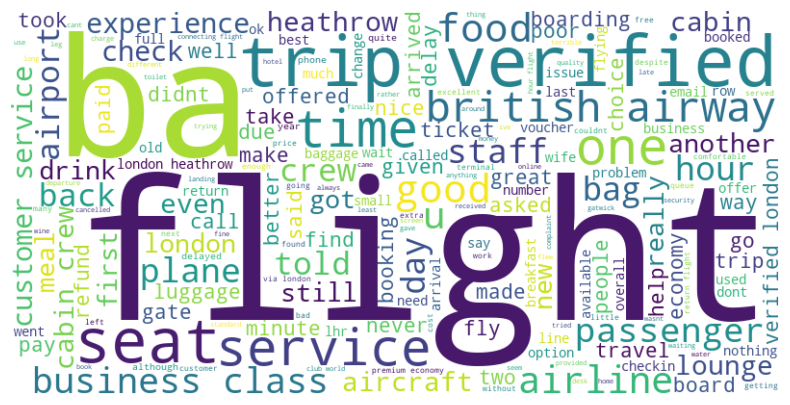

In [28]:
# Combining all cleaned reviews into a single string
all_reviews_text = ' '.join(df['cleaned_reviews'])

# Creating a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Displaying the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

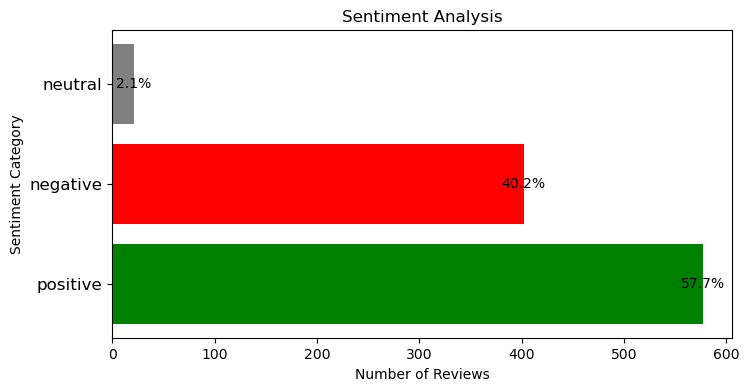

In [29]:
sentiment_counts = df['sentiment_category'].value_counts()

# Calculating the percentage of each sentiment category
total_reviews = len(df)
positive_percentage = (sentiment_counts['positive'] / total_reviews) * 100
negative_percentage = (sentiment_counts['negative'] / total_reviews) * 100
neutral_percentage = (sentiment_counts['neutral'] / total_reviews) * 100

# Plotting the horizontal bar chart
plt.figure(figsize=(8, 4))
plt.barh(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])
plt.xlabel('Number of Reviews')
plt.ylabel('Sentiment Category')
plt.title('Sentiment Analysis')
plt.text(sentiment_counts['positive'], 0, f"{positive_percentage:.1f}%", color='black', ha="center", va="center")
plt.text(sentiment_counts['negative'], 1, f"{negative_percentage:.1f}%", color='black', ha="center", va="center")
plt.text(sentiment_counts['neutral'], 2, f"{neutral_percentage:.1f}%", color='black', ha="center", va="center")
plt.yticks(fontsize=12)
plt.show()

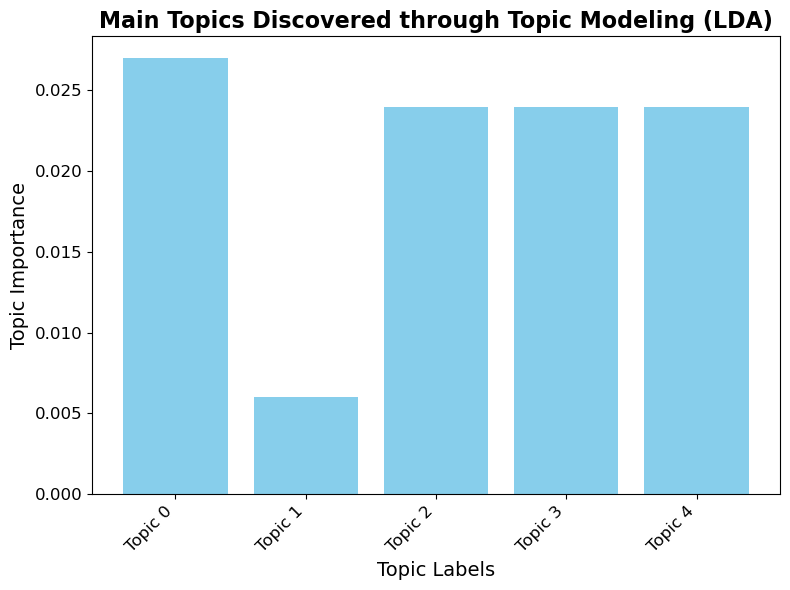

In [30]:
topics_data = {
    'Topic': ['Topic 0', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4'],
    'Importance': [0.027, 0.006, 0.024, 0.024, 0.024]
}

# Creating a DataFrame from the topics data
df_topics = pd.DataFrame(topics_data)

# Plotting the vertical bar chart
plt.figure(figsize=(8, 6))
plt.bar(df_topics['Topic'], df_topics['Importance'], color='skyblue')
plt.xlabel('Topic Labels', fontsize=14)
plt.ylabel('Topic Importance', fontsize=14)
plt.title('Main Topics Discovered through Topic Modeling (LDA)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()